In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_excel("covid 19 (1).xlsx")

In [3]:
a=data.groupby(['Detected State','Gender']).size().reset_index(name="Count")
print(a)

                 Detected State Gender  Count
0   Andaman and Nicobar Islands      F      1
1   Andaman and Nicobar Islands      M      2
2                Andhra Pradesh      F      6
3                Andhra Pradesh      M     32
4                         Assam      M      1
5                         Bihar      F      2
6                         Bihar      M      6
7                    Chandigarh      F      5
8                    Chandigarh      M     10
9                  Chhattisgarh      F      2
10                 Chhattisgarh      M      3
11                        Delhi      F      7
12                        Delhi      M     34
13                          Goa      M      5
14                      Gujarat      F     19
15                      Gujarat      M     29
16                      Haryana      F     10
17                      Haryana      M      4
18             Himachal Pradesh      F      1
19             Himachal Pradesh      M      2
20            Jammu and Kashmir   

In [4]:
print(data.columns)

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')


In [5]:
data["Nationality"]=data["Nationality"].fillna("NIA")

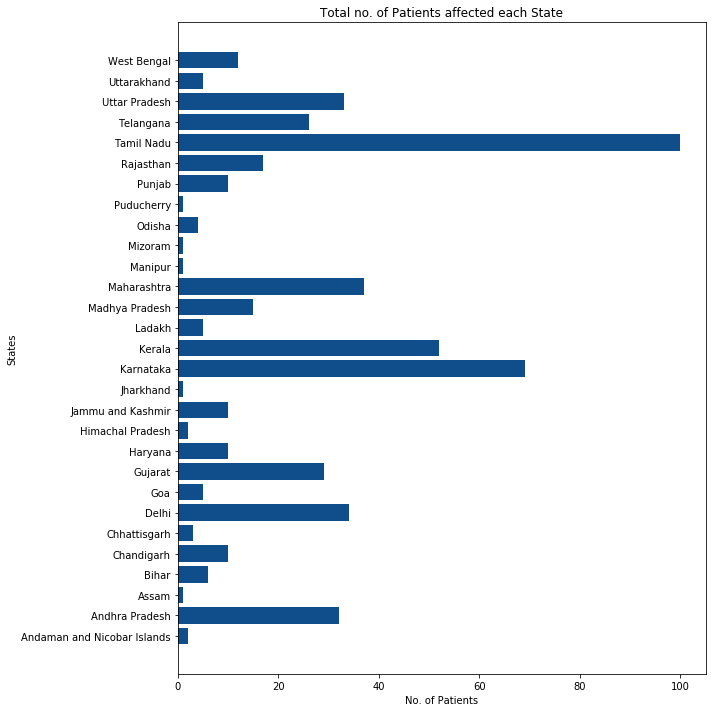

In [6]:
#1  Shows total no. of patients got affected by Corona Virus in particular State
fig, ax1 = plt.subplots(figsize = (10,10)) 
ax1.barh(a["Detected State"],a['Count'],color="#104E8B")
plt.ylabel("States")
plt.xlabel("No. of Patients")
plt.title("Total no. of Patients affected each State")
plt.tight_layout()
plt.show()

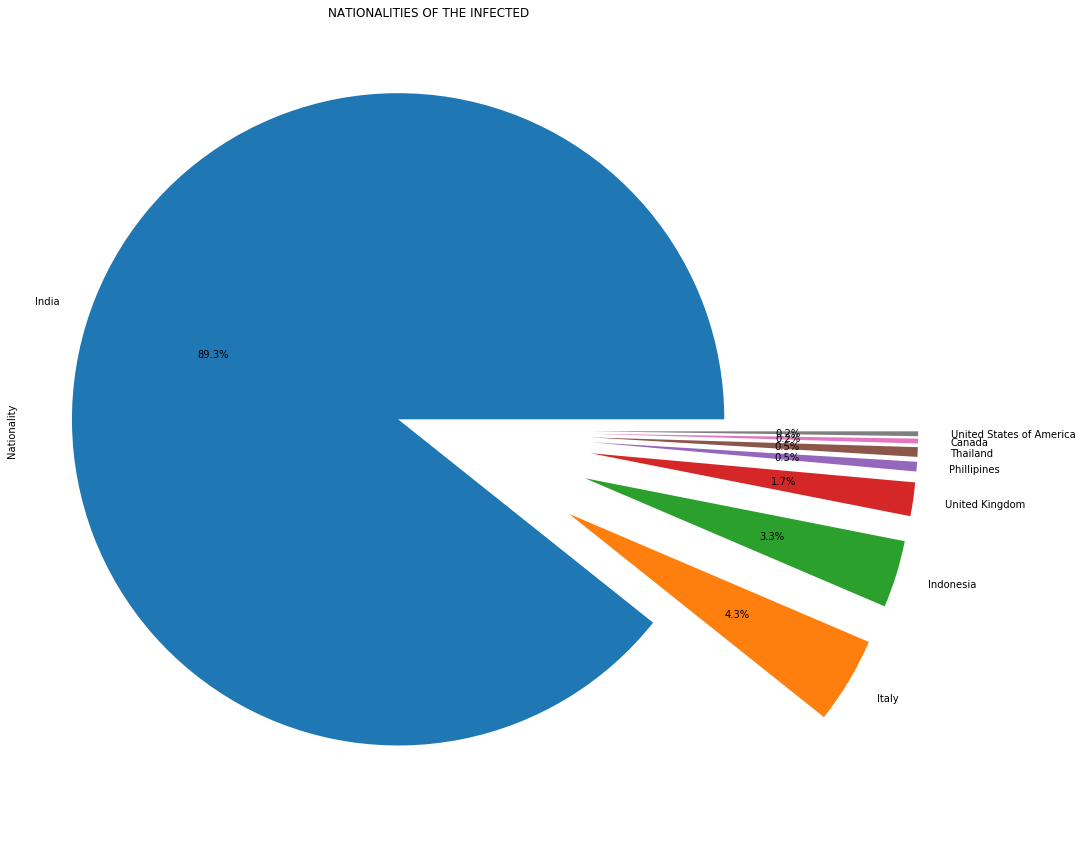

In [8]:
#2 Nationalities of the infected
nationality=data["Nationality"].value_counts()
nationality["India"]+=nationality["Indian"]
nationality=nationality.drop(labels=["NIA","Indian"])
nationality.plot.pie(figsize=[15,15],title="NATIONALITIES OF THE INFECTED",autopct="%1.1f%%",
                    explode=[0.1,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
plt.show()

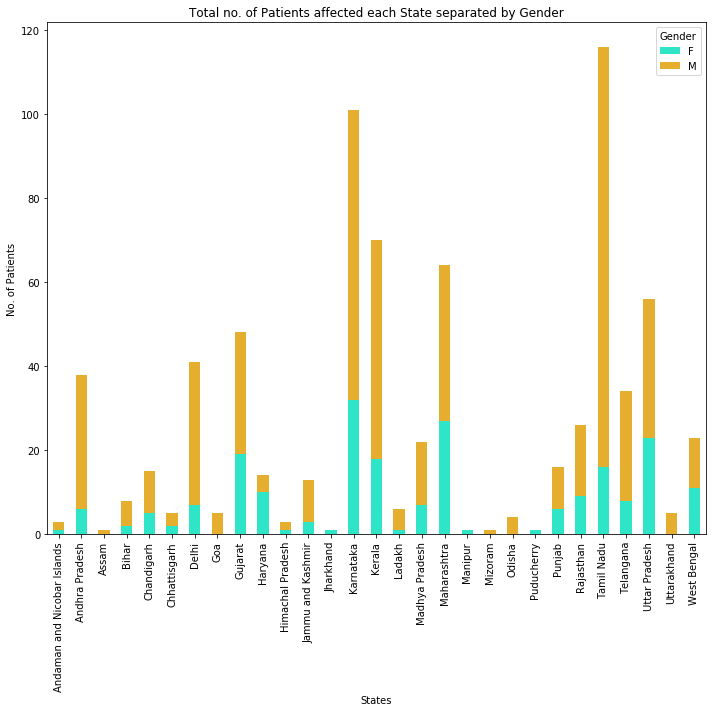

In [9]:
#3  Shows total no.males and females got affected by Corona Virus in particular State 
getdata=data.groupby(["Detected State","Gender"])["Gender"].count()
getdata.unstack().plot.bar(figsize=[10,10],stacked=True,color=["#2EE6C7","#E6AE2E"])
plt.title("Total no. of Patients affected each State separated by Gender")
plt.xlabel("States")
plt.ylabel("No. of Patients")
plt.tight_layout()
plt.show()

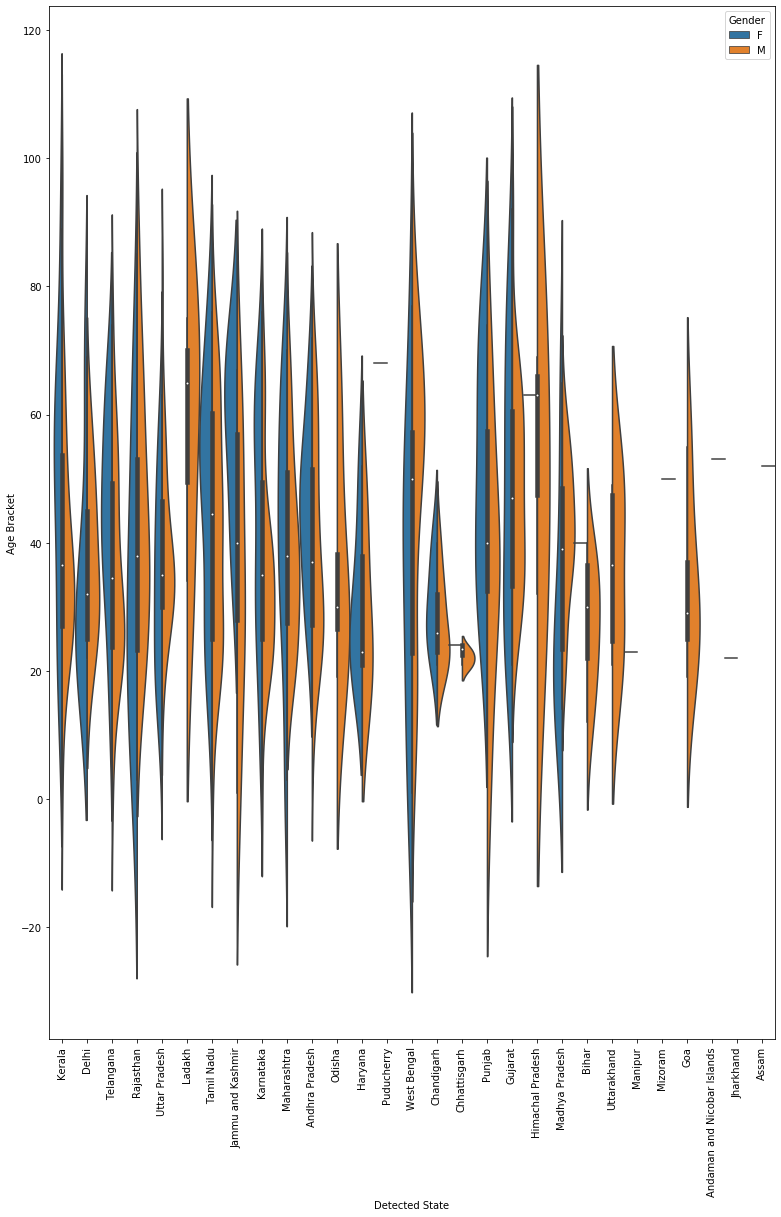

In [12]:
#4 Relation between age and gender ratio over different states of Inida
import seaborn as sns
# Seaborn is used here for the final plot.
# The reason for this is that violinplots have much more functionality in seaborn.
corro=data[["Age Bracket","Detected State","Gender"]].dropna()
corro["Age Bracket"]=[int(str(i)[0:2]) for i in corro["Age Bracket"]]
fig = plt.gcf()
fig.set_size_inches(13,19)
sns.violinplot(x="Detected State",y="Age Bracket",hue="Gender",data=corro,
               split=True,width=1)
plt.xticks(rotation=90)
plt.show()

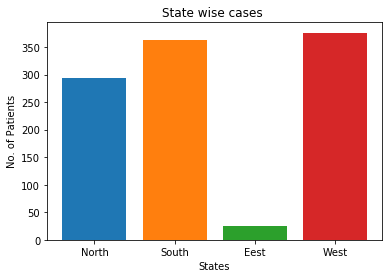

In [17]:
#5  Patients in particular direction  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


df = pd.read_excel ("covid 19 (1).xlsx")
stt=df['Detected State']

north={"Rajastan","Punjab","Delhi","Arunachal Pradesh","Uttarakhand","Haryana","Jammu and Kashmir","Manipur""Uttar Pradesh","Ladakh","Chandigarh"}
nt=0
south={"Kerla","Telangana","Tamil Nadu","Karnataka","Puducherry","Andhra Pradesh"}
st=0
west={"Maharashtra","Gujarat"}
wt=0
east={"Odisha","Bihar"}
et=0
for x in stt:
    if x in north:
        nt+=1
    elif x in south:
        st+=1
    elif x in west:
        wt+=1
    elif x in east:
        et+=1

#stts={"North","South","East","West"}
plt.bar("North",nt)
plt.bar("South",st)
plt.bar("Eest",et)
plt.bar("West",wt)
plt.title("State wise cases ")
plt.xlabel("States")
plt.ylabel("No. of Patients")
plt.show()

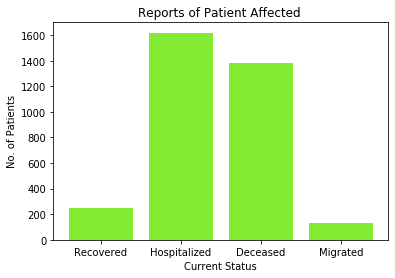

In [18]:
#6   Shows no. of patients grouped by Current Status
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.read_excel("covid 19 (1).xlsx")
plt.bar(df["Current Status"],df["Patient Number"],color="#83eb34")
plt.title("Reports of Patient Affected ")
plt.xlabel("Current Status")
plt.ylabel("No. of Patients")
plt.show()

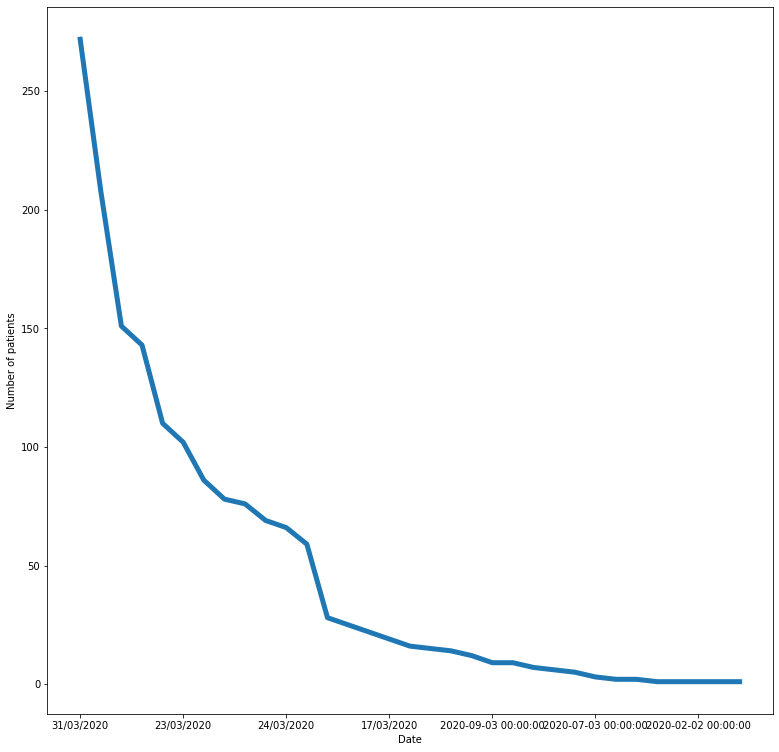

In [19]:
#7 date wise increment decrement of patients
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_excel("covid 19 (1).xlsx")
dt=df["Date Announced"].value_counts()
dt.plot.line(figsize=(13,13),linewidth="5")
plt.xlabel("Date")
plt.ylabel("Number of patients")
plt.show()